In [1]:
import pandas as pd 
from scipy import stats 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../data/data_clean.csv') 
# df = pd.read_sas('data/demographics.xpt', format='xport', index=None, encoding='ISO-8859-1', chunksize=None, iterator=False)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,RIDRETH3,DMDCITZN,DMDEDUC2,MIALANG,DMDHHSIZ,INDHHIN2,...,HIQ011,PAQ635,PAQ650,PAQ665,PAD680,PAQ706,PAQ710,LBXTC,highLDL,bmi
0,73557,69,1,4,4,1.0,3.0,1.0,3,4.0,...,1,2,2,2,600.0,NaN,2.0,167.0,NaN,26.683761
1,73558,54,1,3,3,1.0,3.0,1.0,4,7.0,...,2,2,2,2,540.0,NaN,4.0,170.0,NaN,28.632450
2,73559,72,1,3,3,1.0,4.0,1.0,2,10.0,...,1,2,2,1,300.0,NaN,4.0,126.0,0.0,28.929300
3,73561,73,2,3,3,1.0,5.0,1.0,2,15.0,...,1,2,2,2,480.0,NaN,1.0,201.0,0.0,19.716567
4,73562,56,1,1,1,1.0,4.0,1.0,1,9.0,...,1,2,2,2,360.0,NaN,5.0,226.0,NaN,41.690341


In [ ]:
df.columns 

In [ ]:
df.shape

In [ ]:
df.describe()

In [3]:
# Number of NaN in each feature 
df.isnull().sum()

SEQN           0
RIDAGEYR       0
RIAGENDR       0
RIDRETH1       0
RIDRETH3       0
DMDCITZN      10
DMDEDUC2       7
MIALANG      623
DMDHHSIZ       0
INDHHIN2     276
INDFMIN2     265
INDFMPIR     455
BMXLEG       504
BMXARML      444
BMXARMC      441
BMXWAIST     499
BMDAVSAD     670
BPXPLS       365
BPXPULS      364
BPXSY1       658
BPXDI1       658
CDQ001      1954
CDQ010      1954
DIQ010         0
DIQ160       896
DIQ170       722
DIQ172       722
DIQ180       722
DIQ050         1
DIQ070      4611
DBQ095Z      683
DBD100      2252
DRQSPREP     683
DR1STY       683
DRQSDIET     683
DR1TKCAL     722
DR1TPROT     722
DR1TCARB     722
DR1TSUGR     722
DR1TFIBE     722
DR1TTFAT     722
DR1TSFAT     722
DR1TMFAT     722
DR1TPFAT     722
DR1TCHOL     722
DR1TSODI     722
DR1TALCO     722
DR1_320Z     722
LBDHDD       427
HIQ011         0
PAQ635         0
PAQ650         0
PAQ665         0
PAD680        26
PAQ706      5769
PAQ710         3
LBXTC        427
highLDL     3256
bmi          2

In [4]:
# Number of NaN in each data point (person) 
df.T.isnull().sum() 

0        6
1        6
2        5
3        5
4        3
        ..
5764     8
5765     4
5766    28
5767     7
5768     5
Length: 5769, dtype: int64

In [ ]:
df.info()

In [5]:
for col in df.columns: 
    print(col, '\t Number of Unique elements = ', df[col].nunique()) 
#     print(df[col].unique()) 
#     print() 

SEQN 	 Number of Unique elements =  5769
RIDAGEYR 	 Number of Unique elements =  61
RIAGENDR 	 Number of Unique elements =  2
RIDRETH1 	 Number of Unique elements =  5
RIDRETH3 	 Number of Unique elements =  6
DMDCITZN 	 Number of Unique elements =  2
DMDEDUC2 	 Number of Unique elements =  5
MIALANG 	 Number of Unique elements =  2
DMDHHSIZ 	 Number of Unique elements =  7
INDHHIN2 	 Number of Unique elements =  14
INDFMIN2 	 Number of Unique elements =  14
INDFMPIR 	 Number of Unique elements =  422
BMXLEG 	 Number of Unique elements =  229
BMXARML 	 Number of Unique elements =  170
BMXARMC 	 Number of Unique elements =  313
BMXWAIST 	 Number of Unique elements =  801
BMDAVSAD 	 Number of Unique elements =  240
BPXPLS 	 Number of Unique elements =  44
BPXPULS 	 Number of Unique elements =  2
BPXSY1 	 Number of Unique elements =  68
BPXDI1 	 Number of Unique elements =  52
CDQ001 	 Number of Unique elements =  3
CDQ010 	 Number of Unique elements =  4
DIQ010 	 Number of Unique element

In [ ]:
# stats.zscore(df, nan_policy='omit').describe()
# df[(np.abs(stats.zscore(df, nan_policy='omit')) < 3).all(axis=1)]

FileNotFoundError: [Errno 2] No such file or directory: 'plots/missing_values.png'

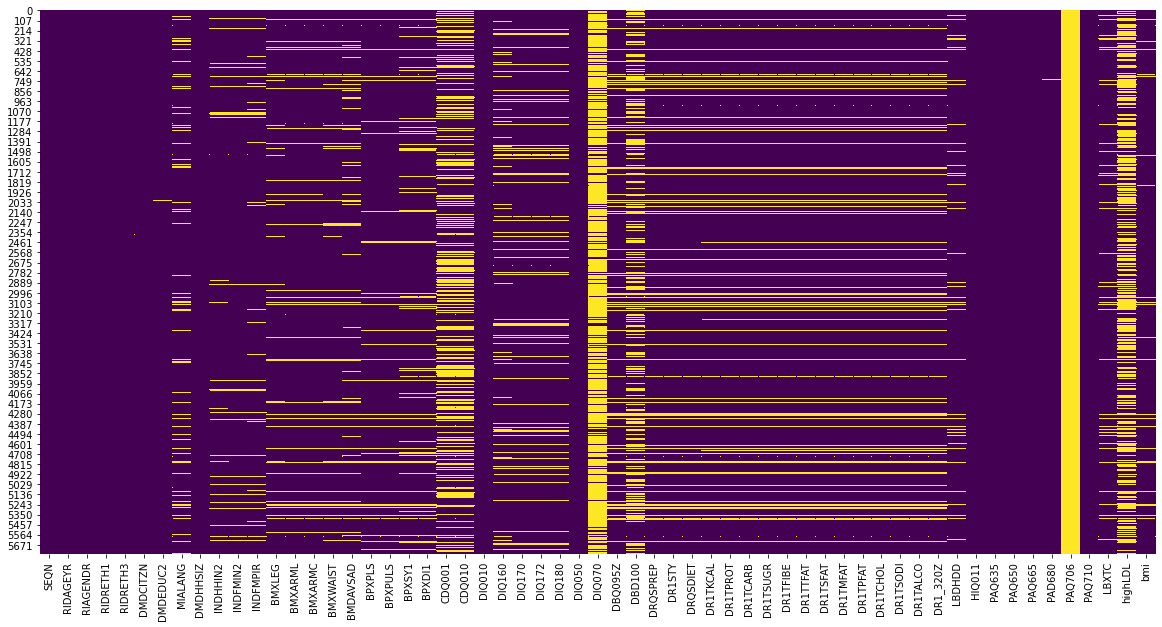

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis') 

plt.savefig('plots/missing_values.png')



In [ ]:
# # Test for filling null values with means of columns 
# for col in df.columns: 
#     df[col].fillna(df[col].mean(), inplace=True)

AttributeError: 'DataFrame' object has no attribute 'savefig'

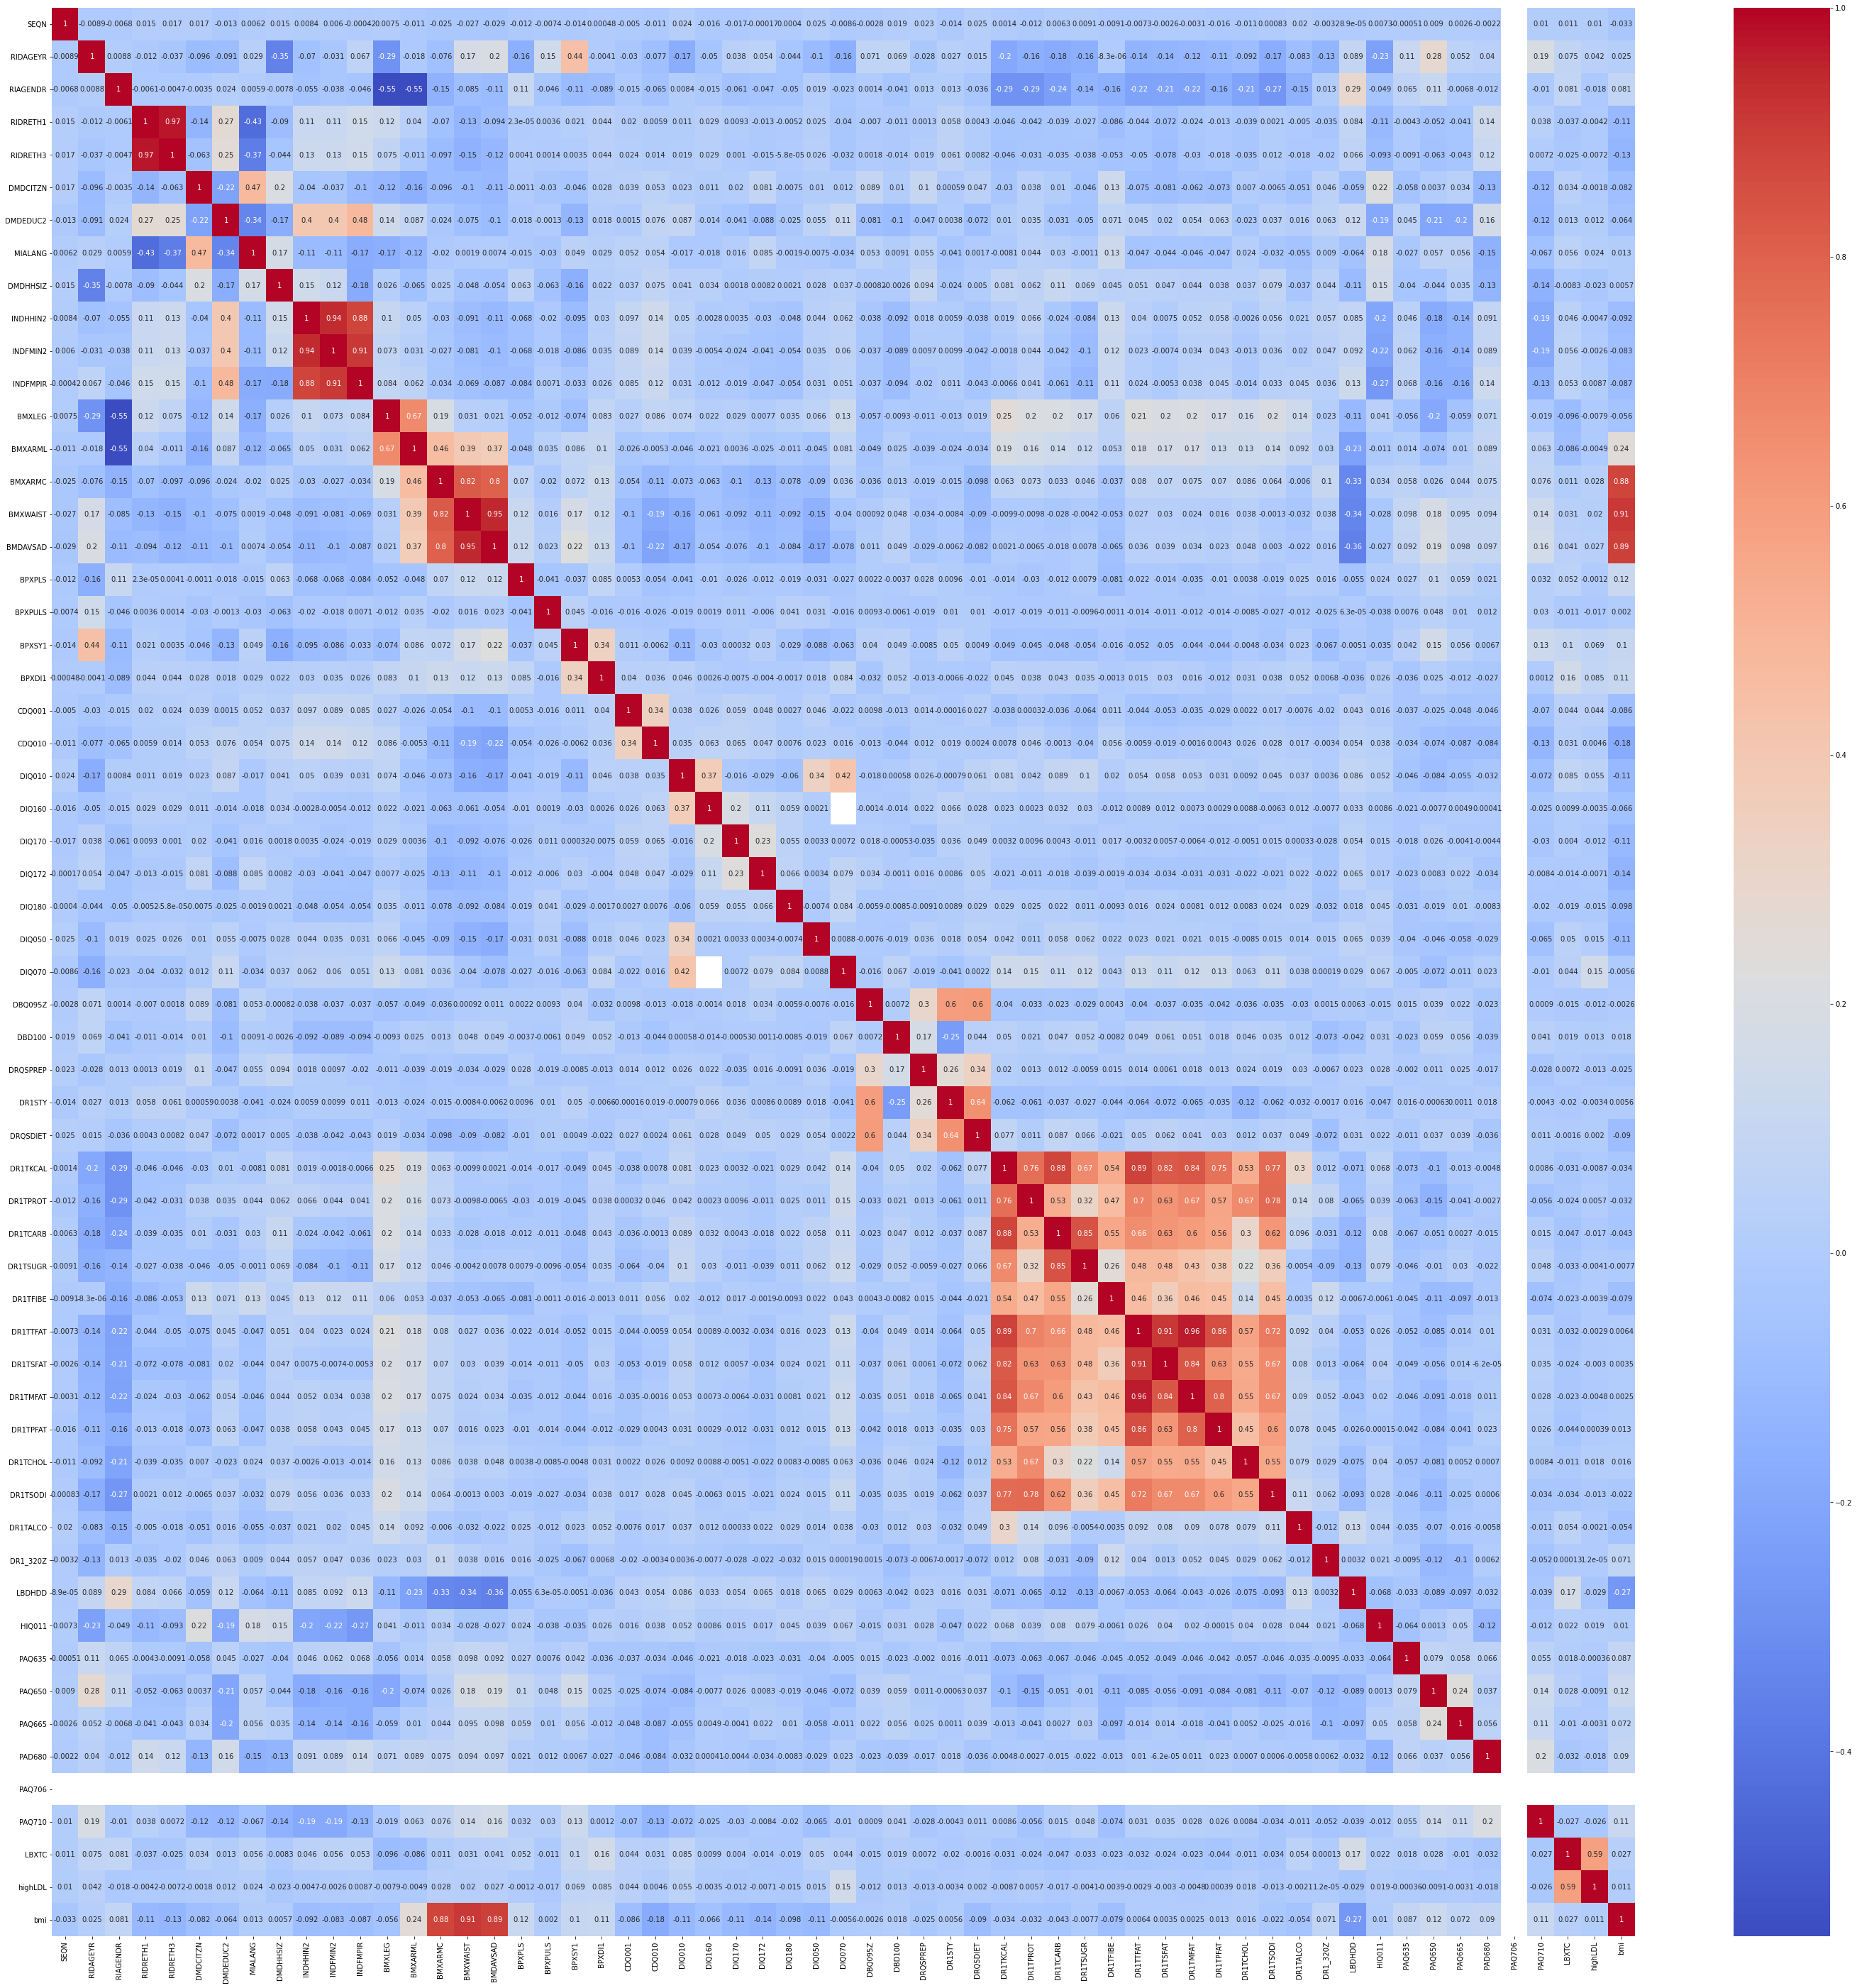

In [8]:
plt.figure(figsize=(50,50))
correlation_df = df.corr(method='pearson') 
correlation_df = df.corr() 
correlation_df.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) 
# print(correlation_df.shape) 
# print(correlation_df.head()) 
sns.heatmap(correlation_df,cbar=True,annot=True,cmap='coolwarm') 
correlation_df.savefig("correlation.png")
plt.savefig('plots/correlation.png')
plt.close() 

In [ ]:
# for cut in range(0,47,10):
#     plt.figure(figsize=(10,10))

#     correlation_df = df[df.columns[cut:cut+10]].corr() 
# #     print(correlation_df.shape) 
# #     print(correlation_df.head()) 
#     sns.heatmap(correlation_df,cbar=True,annot=True,cmap='Blues') 
    
#     plt.show() 

In [ ]:
for col in df.columns: 
    print(col)
    fig, ax = plt.subplots()
    df.hist(col, ax=ax)
    fig.savefig('plots/distributions/'+col+'.png') 
    plt.close() 

In [ ]:
# from pandas.plotting import scatter_matrix

# pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [ ]:
for col1 in df.columns: 
    for col2 in df.columns: 
            if col1 != col2: 
                fig, ax = plt.subplots()
                df.plot.scatter(x=col1, y=col2, c='DarkBlue', ax=ax) 
                fig.savefig('plots/pattern_2d/'+ col1 + '_' + col2 + '.png') 
                plt.close() 

In [ ]:
from matplotlib import cm
for col1 in df.columns: 
    for col2 in df.columns: 
        for col3 in df.columns: 
            if col1 != col2 and col2 != col3 and col1 != col3: 
                fig, ax = plt.subplots()
                df.plot.scatter(x=col1, y=col2, c=col3, cmap=cm.get_cmap('Spectral'), ax=ax) 
                fig.savefig('plots/pattern_3d/'+ col1 + '_' + col2 + '_' + col3 + '.png') 
                plt.close() 

In [ ]:
df.plot.scatter(x='BMXWT', y='BMXHT', c='BMXWAIST') 